Figure 5: Barotropic Stream Function - CNTRL, Anom and Time-series

In [1]:
# Load modules
%pylab inline
from netCDF4 import Dataset # to work with NetCDF files
import numpy as np
import matplotlib.pyplot as plt # to generate plots

from os.path import expanduser
home = expanduser("~") # Get users home directory
import os # operating system interface
import scipy as sp
import xarray as xr
import scipy.interpolate
import scipy.ndimage
#import seawater as sw
from mpl_toolkits.axes_grid1 import make_axes_locatable
import cmocean.cm as cmocean
from dask.distributed import Client


%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
client = Client(n_workers=8)
client

/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.07/lib/python3.9/site-packages/distributed/node.py:183: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 37771 instead
  warnings.warn(


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/37771/status,
Dashboard: /proxy/37771/status,Workers: 8
Total threads: 8,Total memory: 100.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:44789,Workers: 8
Dashboard: /proxy/37771/status,Total threads: 8
Started: Just now,Total memory: 100.00 GiB
Comm: tcp://127.0.0.1:38843,Total threads: 1
Dashboard: /proxy/44499/status,Memory: 12.50 GiB
Nanny: tcp://127.0.0.1:39799,


In [3]:
vgrid_file ='/g/data/hh5/tmp/pas561/mom01_unmasked_ocean_grid.nc'
vgrid01=xr.open_dataset(vgrid_file)
vgrid01

<xarray.Dataset>
Dimensions:     (xt_ocean: 3600, yt_ocean: 2700, time: 1, xu_ocean: 3600,
                 yu_ocean: 2700)
Coordinates:
  * xt_ocean    (xt_ocean) float64 -279.9 -279.8 -279.7 ... 79.75 79.85 79.95
  * yt_ocean    (yt_ocean) float64 -81.11 -81.07 -81.02 ... 89.89 89.94 89.98
  * time        (time) object 0031-01-11 00:00:00
  * xu_ocean    (xu_ocean) float64 -279.9 -279.8 -279.7 ... 79.8 79.9 80.0
  * yu_ocean    (yu_ocean) float64 -81.09 -81.05 -81.0 ... 89.92 89.96 90.0
    geolon_t    (yt_ocean, xt_ocean) float32 ...
    geolat_t    (yt_ocean, xt_ocean) float32 ...
    geolon_c    (yu_ocean, xu_ocean) float32 ...
    geolat_c    (yu_ocean, xu_ocean) float32 ...
Data variables: (12/13)
    ht          (yt_ocean, xt_ocean) float32 ...
    hu          (yu_ocean, xu_ocean) float32 ...
    area_t      (yt_ocean, xt_ocean) float32 ...
    area_u      (yu_ocean, xu_ocean) float32 ...
    kmt         (yt_ocean, xt_ocean) float32 ...
    kmu         (yu_ocean, xu_ocean) float32 ...
    ...          ...
    dxt         (yt_ocean, xt_ocean) float32 ...
    dyt         (yt_ocean, xt_ocean) float32 ...
    dxu         (yu_ocean, xu_ocean) float32 ...
    dyu         (yu_ocean, xu_ocean) float32 ...
    f_coriolis  (yu_ocean, xu_ocean) float32 ...
    beta        (yu_ocean, xu_ocean) float32 ...
Attributes:
    filename:   ocean_grid.nc
    title:      MOM5_CORE_NYF_50lvl_comparison_test
    grid_type:  mosaic
    grid_tile:  1

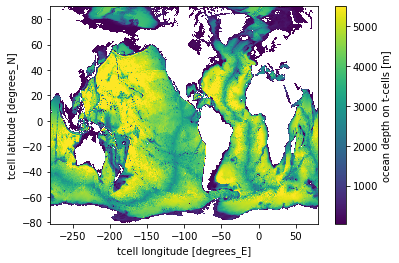

In [4]:
vgrid01.ht.plot()

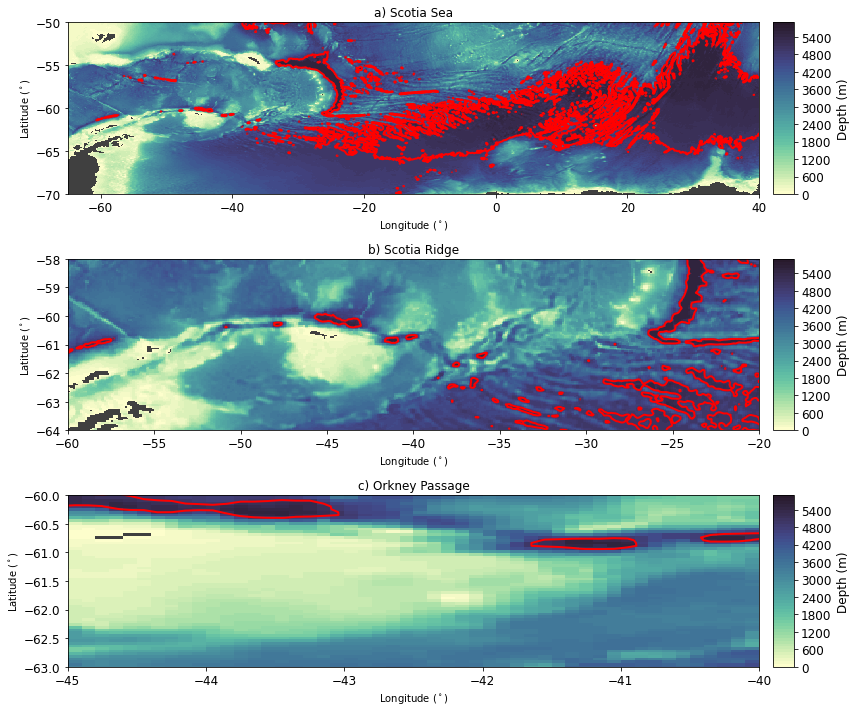

In [5]:
fontsize=12

plt.figure(figsize=(12,10))

clev2 = np.arange(0,6000,100)

plt.subplot(3,1,1)
plt.gca().patch.set_color('.25')
pc=vgrid01.ht.plot.pcolormesh(x='xt_ocean', y='yt_ocean',vmin=0, vmax=5500, levels=clev2,cmap=cmocean.deep,add_colorbar=False)
plt.contour(vgrid01.ht.xt_ocean,vgrid01.ht.yt_ocean,vgrid01.ht,levels=[5000],colors='r',linewidths=2)
plt.ylim((-70,-50))
#plt.yticks([-65, -62.5, -60, -57.5, -55])
plt.ylabel('Latitude ($^\circ$)')
plt.xlabel('Longitude ($^\circ$)')
plt.xlim([-65,40])
plt.title('a) Scotia Sea',fontsize=fontsize)
#plt.xticks([-60, -40, -20, 0, 20, 40])
plt.tick_params(labelsize=fontsize)
#plt.contourf(ht.xt_ocean, ht.yt_ocean,land_mask,colors='grey')

# colorbar:
ax = plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.2)
cbar = plt.colorbar(pc, cax=cax,orientation = 'vertical',extend = 'neither')
cbar.set_label(r'Depth (m)',fontsize=fontsize,labelpad=5)
cbar.ax.tick_params(labelsize=fontsize)


plt.subplot(3,1,2)
plt.gca().patch.set_color('.25')
pc=vgrid01.ht.plot.pcolormesh(x='xt_ocean', y='yt_ocean',vmin=0, vmax=5500, levels=clev2,cmap=cmocean.deep,add_colorbar=False)
plt.contour(vgrid01.ht.xt_ocean,vgrid01.ht.yt_ocean,vgrid01.ht,levels=[5000],colors='r',linewidths=2)
plt.ylim((-64,-58))
#plt.yticks([-61, -60.75, -60.5, -60.25, -60])
plt.xlim([-60,-20])
plt.title('b) Scotia Ridge',fontsize=fontsize)
plt.ylabel('Latitude ($^\circ$)')
plt.xlabel('Longitude ($^\circ$)')
plt.tick_params(labelsize=fontsize)
#plt.contourf(ht.xt_ocean, ht.yt_ocean,land_mask,colors='grey')

# colorbar:
ax = plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.2)
cbar = plt.colorbar(pc, cax=cax,orientation = 'vertical',extend = 'neither')
cbar.set_label(r'Depth (m)',fontsize=fontsize,labelpad=5)
cbar.ax.tick_params(labelsize=fontsize)

plt.subplot(3,1,3)
plt.gca().patch.set_color('.25')
pc=vgrid01.ht.plot.pcolormesh(x='xt_ocean', y='yt_ocean',vmin=0, vmax=5500, levels=clev2,cmap=cmocean.deep,add_colorbar=False)
plt.contour(vgrid01.ht.xt_ocean,vgrid01.ht.yt_ocean,vgrid01.ht,levels=[5000],colors='r',linewidths=2)
plt.ylim((-63,-60))
plt.xlim([-45,-40])
plt.title('c) Orkney Passage',fontsize=fontsize)
plt.ylabel('Latitude ($^\circ$)')
plt.xlabel('Longitude ($^\circ$)')
plt.tick_params(labelsize=fontsize)
#plt.contourf(ht.xt_ocean, ht.yt_ocean,land_mask,colors='grey')

# colorbar:
ax = plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.2)
cbar = plt.colorbar(pc, cax=cax,orientation = 'vertical',extend = 'neither')
cbar.set_label(r'Depth (m)',fontsize=fontsize,labelpad=5)
cbar.ax.tick_params(labelsize=fontsize)

plt.tight_layout()

In [265]:
#calculate volume transport in rho space across -60.5S and between -54W to -32W 
#or northward volume transport across 60S between 60W to 20W, between 1000-4000m and 4-6km depth 
NYFCntrlDir = '/g/data3/hh5/tmp/pas561/kds75_cp_ann/'
Ocean_File = os.path.join(NYFCntrlDir,'ocean_*.nc')
print(Ocean_File)
cntrl=xr.open_mfdataset(Ocean_File,engine='netcdf4',combine='nested',concat_dim='time')#,decode_times=False)


/g/data3/hh5/tmp/pas561/kds75_cp_ann/ocean_*.nc


/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.07/lib/python3.9/site-packages/xarray/coding/times.py:699: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)


In [266]:
cntrl

<xarray.Dataset>
Dimensions:          (xt_ocean: 3600, yt_ocean: 1351, time: 42, nv: 2,
                      xu_ocean: 3600, yu_ocean: 1351, st_ocean: 75,
                      st_edges_ocean: 76, sw_ocean: 75, sw_edges_ocean: 76,
                      grid_xt_ocean: 3600, grid_yu_ocean: 2700, potrho: 80,
                      potrho_edges: 81)
Coordinates: (12/18)
  * xt_ocean         (xt_ocean) float64 -279.9 -279.8 -279.7 ... 79.85 79.95
  * yt_ocean         (yt_ocean) float64 -81.11 -81.07 -81.02 ... 10.39 10.49
  * time             (time) object 0114-09-30 21:00:00 ... 0155-07-01 15:00:00
  * nv               (nv) float64 1.0 2.0
  * xu_ocean         (xu_ocean) float64 -279.9 -279.8 -279.7 ... 79.8 79.9 80.0
  * yu_ocean         (yu_ocean) float64 -81.09 -81.05 -81.0 ... 10.44 10.54
    ...               ...
  * potrho           (potrho) float64 1.028e+03 1.028e+03 ... 1.038e+03
  * potrho_edges     (potrho_edges) float64 1.028e+03 1.028e+03 ... 1.038e+03
    geolon_t         (yt_ocean, xt_ocean) float32 dask.array<chunksize=(1351, 3600), meta=np.ndarray>
    geolat_t         (yt_ocean, xt_ocean) float32 dask.array<chunksize=(1351, 3600), meta=np.ndarray>
    geolon_c         (yu_ocean, xu_ocean) float32 dask.array<chunksize=(1351, 3600), meta=np.ndarray>
    geolat_c         (yu_ocean, xu_ocean) float32 dask.array<chunksize=(1351, 3600), meta=np.ndarray>
Data variables: (12/22)
    temp             (time, st_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 75, 1351, 3600), meta=np.ndarray>
    salt             (time, st_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 75, 1351, 3600), meta=np.ndarray>
    age_global       (time, st_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 75, 1351, 3600), meta=np.ndarray>
    u                (time, st_ocean, yu_ocean, xu_ocean) float32 dask.array<chunksize=(1, 75, 1351, 3600), meta=np.ndarray>
    v                (time, st_ocean, yu_ocean, xu_ocean) float32 dask.array<chunksize=(1, 75, 1351, 3600), meta=np.ndarray>
    sea_level        (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 1351, 3600), meta=np.ndarray>
    ...               ...
    ty_trans_rho     (time, potrho, grid_yu_ocean, grid_xt_ocean) float32 dask.array<chunksize=(1, 80, 2700, 3600), meta=np.ndarray>
    diff_cbt_t       (time, st_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 75, 1351, 3600), meta=np.ndarray>
    average_T1       (time) object dask.array<chunksize=(1,), meta=np.ndarray>
    average_T2       (time) object dask.array<chunksize=(1,), meta=np.ndarray>
    average_DT       (time) timedelta64[ns] dask.array<chunksize=(1,), meta=np.ndarray>
    time_bounds      (time, nv) timedelta64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
Attributes:
    filename:   ocean.nc
    title:      MOM4p1_CORE_IAF_v20120531_0849_noRestore_runoff_fix
    grid_type:  mosaic
    grid_tile:  1
    history:    Tue Feb 12 15:32:02 2019: ncra -d yt_ocean,0,1350 -d yu_ocean...
    NCO:        netCDF Operators version 4.7.7 (Homepage = http://nco.sf.net,...

In [215]:
cntrl.ty_trans_rho

<xarray.DataArray 'ty_trans_rho' (time: 42, potrho: 80, grid_yu_ocean: 2700,
                                  grid_xt_ocean: 3600)>
dask.array<concatenate, shape=(42, 80, 2700, 3600), dtype=float32, chunksize=(1, 80, 2700, 3600), chunktype=numpy.ndarray>
Coordinates:
  * time           (time) object 0114-09-30 21:00:00 ... 0155-07-01 15:00:00
  * grid_xt_ocean  (grid_xt_ocean) float64 -279.9 -279.8 -279.7 ... 79.85 79.95
  * grid_yu_ocean  (grid_yu_ocean) float64 -81.09 -81.05 -81.0 ... 89.96 90.0
  * potrho         (potrho) float64 1.028e+03 1.028e+03 ... 1.038e+03 1.038e+03
Attributes:
    long_name:      T-cell j-mass transport on pot_rho
    units:          Sv (10^9 kg/s)
    valid_range:    [-1.e+20  1.e+20]
    cell_methods:   time: mean
    time_avg_info:  average_T1,average_T2,average_DT

In [8]:
psi= cntrl.ty_trans_rho.sum('grid_xt_ocean')
#psi = psi / (1e6*rho) # converts kg/s to Sv
psi = (psi.cumsum('potrho') - psi.sum('potrho')).compute()
print(psi.shape)
cntrl_moc=psi

(42, 80, 2700)


In [9]:
cntrl_moc_avg=cntrl_moc.mean(dim='time').compute()
cntrl_moc_avg

<xarray.DataArray 'ty_trans_rho' (potrho: 80, grid_yu_ocean: 2700)>
array([[ 0.        ,  0.        ,  0.        , ..., -0.00072585,
        -0.00067098, -0.00049482],
       [ 0.        ,  0.        ,  0.        , ..., -0.00080275,
        -0.00070427, -0.000485  ],
       [ 0.        ,  0.        ,  0.        , ..., -0.00086981,
        -0.00071165, -0.00047938],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]], dtype=float32)
Coordinates:
  * grid_yu_ocean  (grid_yu_ocean) float64 -81.09 -81.05 -81.0 ... 89.96 90.0
  * potrho         (potrho) float64 1.028e+03 1.028e+03 ... 1.038e+03 1.038e+03

/jobfs/67521189.gadi-pbs/ipykernel_84751/76276211.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticks)


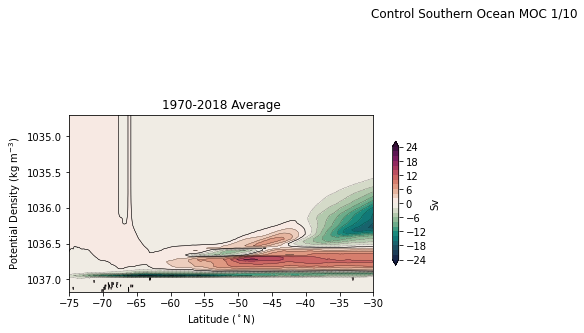

In [10]:
#fig,ax = plt.subplots(2,2,figsize=(10, 5)) 
plt.figure(figsize=(15,15))
plt.suptitle('Control Southern Ocean MOC 1/10')

plt.subplot(4,2,1)
ax = plt.gca()
clev = np.arange(-24,26,2)
yticks = np.array([1033, 1035, 1035.5, 1036,1036.5, 1037,1037.5])
scfac = 8  ## A power to set teh stretching

p1=ax.contourf(cntrl_moc_avg.grid_yu_ocean,cntrl_moc_avg.potrho**scfac, cntrl_moc_avg, cmap=cmocean.curl, levels=clev, extend='both')
cb=plt.colorbar(p1,orientation='vertical', shrink = 0.7)
    
cb.ax.set_ylabel('Sv')
ax.contour(cntrl_moc_avg.grid_yu_ocean,cntrl_moc_avg.potrho**scfac, cntrl_moc_avg, levels=clev, colors='k', linewidths=0.25)
ax.contour(cntrl_moc_avg.grid_yu_ocean,cntrl_moc_avg.potrho**scfac, cntrl_moc_avg, levels=[0.0,], colors='k', linewidths=0.5)

#ax.set_yticks((yticks-1028)**scfac)
ax.set_yticklabels(yticks)
#ax.set_ylim([0.5**scfac, 9.2**scfac])
ax.invert_yaxis()
ax.set_ylabel('Potential Density (kg m$^{-3}$)')
ax.set_xlabel('Latitude ($^\circ$N)')
ax.set_xlim([-75,-30])
ax.set_title('1970-2018 Average');

In [212]:
cntrl.potrho

<xarray.DataArray 'potrho' (potrho: 80)>
array([1028.0625, 1028.1875, 1028.3125, 1028.4375, 1028.5625, 1028.6875,
       1028.8125, 1028.9375, 1029.0625, 1029.1875, 1029.3125, 1029.4375,
       1029.5625, 1029.6875, 1029.8125, 1029.9375, 1030.0625, 1030.1875,
       1030.3125, 1030.4375, 1030.5625, 1030.6875, 1030.8125, 1030.9375,
       1031.0625, 1031.1875, 1031.3125, 1031.4375, 1031.5625, 1031.6875,
       1031.8125, 1031.9375, 1032.0625, 1032.1875, 1032.3125, 1032.4375,
       1032.5625, 1032.6875, 1032.8125, 1032.9375, 1033.0625, 1033.1875,
       1033.3125, 1033.4375, 1033.5625, 1033.6875, 1033.8125, 1033.9375,
       1034.0625, 1034.1875, 1034.3125, 1034.4375, 1034.5625, 1034.6875,
       1034.8125, 1034.9375, 1035.0625, 1035.1875, 1035.3125, 1035.4375,
       1035.5625, 1035.6875, 1035.8125, 1035.9375, 1036.0625, 1036.1875,
       1036.3125, 1036.4375, 1036.5625, 1036.6875, 1036.8125, 1036.9375,
       1037.0625, 1037.1875, 1037.3125, 1037.4375, 1037.5625, 1037.6875,
       1037.8125, 1037.9375])
Coordinates:
  * potrho   (potrho) float64 1.028e+03 1.028e+03 ... 1.038e+03 1.038e+03
Attributes:
    long_name:       potential density
    units:           kg/m^3
    cartesian_axis:  Z
    positive:        down
    edges:           potrho_edges

In [291]:
rho_min=1037

In [292]:
tmp=cntrl.ty_trans_rho.sel(potrho=slice(rho_min,1038),grid_xt_ocean=slice(-60,-30)).sel(grid_yu_ocean=-60.5,method='nearest')
tmp=tmp.sum('potrho').sum('grid_xt_ocean') 
cntrl01_60to30=tmp.compute()

In [293]:
tmp=cntrl.ty_trans_rho.sel(potrho=slice(rho_min,1038),grid_xt_ocean=slice(-60,-20)).sel(grid_yu_ocean=-60.5,method='nearest')
tmp=tmp.sum('potrho').sum('grid_xt_ocean') 
cntrl01_60to20=tmp.compute()

In [294]:
tmp=cntrl.ty_trans_rho.sel(potrho=slice(rho_min,1038),grid_xt_ocean=slice(-60,-10)).sel(grid_yu_ocean=-60.5,method='nearest')
tmp=tmp.sum('potrho').sum('grid_xt_ocean') 
cntrl01_60to10=tmp.compute()

In [295]:
tmp=cntrl.ty_trans_rho.sel(potrho=slice(rho_min,1038),grid_xt_ocean=slice(-60,0)).sel(grid_yu_ocean=-60.5,method='nearest')
tmp=tmp.sum('potrho').sum('grid_xt_ocean') 
cntrl01_60to0=tmp.compute()

In [296]:
tmp=cntrl.ty_trans_rho.sel(potrho=slice(rho_min,1038),grid_xt_ocean=slice(-60,20)).sel(grid_yu_ocean=-60.5,method='nearest')
tmp=tmp.sum('potrho').sum('grid_xt_ocean') 
cntrl01_60to20E=tmp.compute()

In [297]:
tmp=cntrl.ty_trans.sel(st_ocean=slice(4000,6000),xt_ocean=slice(-60,60)).sel(yu_ocean=-60.5,method='nearest')
tmp=tmp.sum('st_ocean').sum('xt_ocean') 
cntrl_trans=tmp[:-1].compute()

In [298]:
#calculate volume transport in rho space across -60.5S and between -54W to -32W 
#or northward volume transport across 60S between 60W to 20W, between 1000-4000m and 4-6km depth 
NYFPertDir = '/g/data3/hh5/tmp/pas561/kds75_wp2/2yr/'

Ocean_File = os.path.join(NYFPertDir,'ocean_*.nc')
print(Ocean_File)
pert=xr.open_mfdataset(Ocean_File,engine='netcdf4',combine='nested',concat_dim='time')#,decode_times=False)

/g/data3/hh5/tmp/pas561/kds75_wp2/2yr/ocean_*.nc


/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.07/lib/python3.9/site-packages/xarray/coding/times.py:699: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)


In [299]:
tmp=pert.ty_trans.sel(st_ocean=slice(4000,6000),xt_ocean=slice(-60,60)).sel(yu_ocean=-60.5,method='nearest')
tmp=tmp.sum('st_ocean').sum('xt_ocean') # converts kg/s to Sv ... already in SV
pert_trans=tmp.compute()

In [300]:
tmp=pert.ty_trans_rho.sel(potrho=slice(rho_min,1038),grid_xt_ocean=slice(-60,-30)).sel(grid_yu_ocean=-60.5,method='nearest')
tmp=tmp.sum('potrho').sum('grid_xt_ocean') 
pert01_60to30=tmp.compute()

In [301]:
tmp=pert.ty_trans_rho.sel(potrho=slice(rho_min,1038),grid_xt_ocean=slice(-60,-20)).sel(grid_yu_ocean=-60.5,method='nearest')
tmp=tmp.sum('potrho').sum('grid_xt_ocean') 
pert01_60to20=tmp.compute()

In [302]:
tmp=pert.ty_trans_rho.sel(potrho=slice(rho_min,1038),grid_xt_ocean=slice(-60,-10)).sel(grid_yu_ocean=-60.5,method='nearest')
tmp=tmp.sum('potrho').sum('grid_xt_ocean') 
pert01_60to10=tmp.compute()

In [303]:
tmp=pert.ty_trans_rho.sel(potrho=slice(rho_min,1038),grid_xt_ocean=slice(-60,0)).sel(grid_yu_ocean=-60.5,method='nearest')
tmp=tmp.sum('potrho').sum('grid_xt_ocean') 
pert01_60to0=tmp.compute()

In [304]:
tmp=pert.ty_trans_rho.sel(potrho=slice(rho_min,1038),grid_xt_ocean=slice(-60,20)).sel(grid_yu_ocean=-60.5,method='nearest')
tmp=tmp.sum('potrho').sum('grid_xt_ocean') 
pert01_60to20E=tmp.compute()

In [305]:
pert01_60to30.shape

(41,)

In [306]:
cntrl01_60to30.shape

(42,)

In [307]:
yrs=np.arange(1973,2015,1)
yrs.shape

(42,)

In [308]:
a=pert01_60to30-cntrl01_60to30
a.shape

(41,)

In [309]:
yrs[1:].shape

(41,)

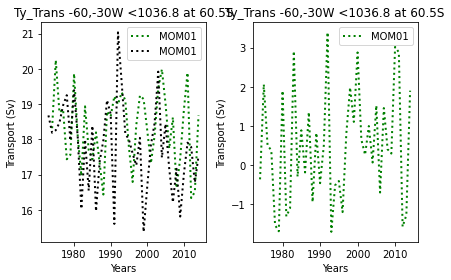

In [310]:
plt.subplot(121)
plt.plot(yrs[1:],pert01_60to30,linestyle=':',color='g',linewidth=2,label='MOM01')
plt.plot(yrs,cntrl01_60to30,linestyle=':',color='k',linewidth=2,label='MOM01')
#plt.xlim((1037.5,1035))
plt.ylabel('Transport (Sv)')
plt.xlabel('Years')
#plt.xlim([1973,1973+12])
tit='Ty_Trans -60,-30W <1036.8 at 60.5S'
plt.title(tit)
plt.legend(fontsize=10)

plt.subplot(122)
plt.plot(yrs[1:],pert01_60to30-cntrl01_60to30,linestyle=':',color='g',linewidth=2,label='MOM01')
#plt.xlim((1037.5,1035))
plt.ylabel('Transport (Sv)')
plt.xlabel('Years')
#plt.xlim([1973,1973+12])
tit='Ty_Trans -60,-30W <1036.8 at 60.5S'
plt.title(tit)
plt.legend(fontsize=10)


plt.tight_layout()

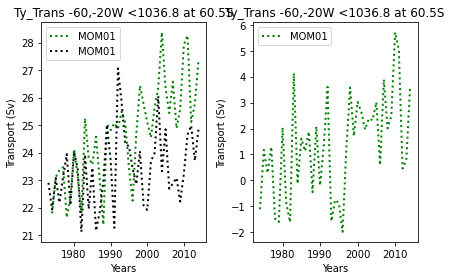

In [311]:
plt.subplot(121)
plt.plot(yrs[1:],pert01_60to20,linestyle=':',color='g',linewidth=2,label='MOM01')
plt.plot(yrs,cntrl01_60to20,linestyle=':',color='k',linewidth=2,label='MOM01')
#plt.xlim((1037.5,1035))
plt.ylabel('Transport (Sv)')
plt.xlabel('Years')
#plt.xlim([1973,1973+12])
tit='Ty_Trans -60,-20W <1036.8 at 60.5S'
plt.title(tit)
plt.legend(fontsize=10)

plt.subplot(122)
plt.plot(yrs[1:],pert01_60to20-cntrl01_60to20,linestyle=':',color='g',linewidth=2,label='MOM01')
#plt.xlim((1037.5,1035))
plt.ylabel('Transport (Sv)')
plt.xlabel('Years')
#plt.xlim([1973,1973+12])
tit='Ty_Trans -60,-20W <1036.8 at 60.5S'
plt.title(tit)
plt.legend(fontsize=10)


plt.tight_layout()

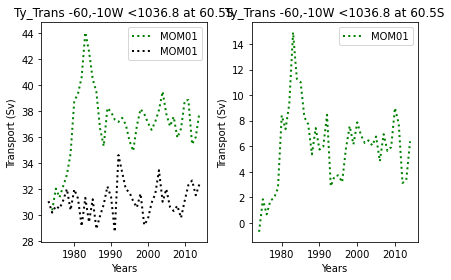

In [312]:
plt.subplot(121)
plt.plot(yrs[1:],pert01_60to10,linestyle=':',color='g',linewidth=2,label='MOM01')
plt.plot(yrs,cntrl01_60to10,linestyle=':',color='k',linewidth=2,label='MOM01')
#plt.xlim((1037.5,1035))
plt.ylabel('Transport (Sv)')
plt.xlabel('Years')
#plt.xlim([1973,1973+12])
tit='Ty_Trans -60,-10W <1036.8 at 60.5S'
plt.title(tit)
plt.legend(fontsize=10)

plt.subplot(122)
plt.plot(yrs[1:],pert01_60to10-cntrl01_60to10,linestyle=':',color='g',linewidth=2,label='MOM01')
#plt.xlim((1037.5,1035))
plt.ylabel('Transport (Sv)')
plt.xlabel('Years')
#plt.xlim([1973,1973+12])
tit='Ty_Trans -60,-10W <1036.8 at 60.5S'
plt.title(tit)
plt.legend(fontsize=10)


plt.tight_layout()

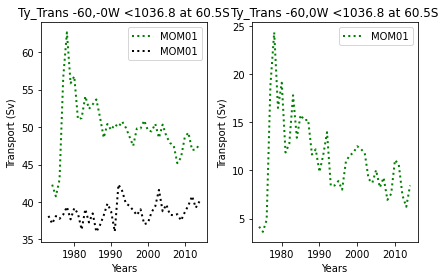

In [313]:
plt.subplot(121)
plt.plot(yrs[1:],pert01_60to0,linestyle=':',color='g',linewidth=2,label='MOM01')
plt.plot(yrs,cntrl01_60to0,linestyle=':',color='k',linewidth=2,label='MOM01')
#plt.xlim((1037.5,1035))
plt.ylabel('Transport (Sv)')
plt.xlabel('Years')
#plt.xlim([1973,1973+12])
tit='Ty_Trans -60,-0W <1036.8 at 60.5S'
plt.title(tit)
plt.legend(fontsize=10)

plt.subplot(122)
plt.plot(yrs[1:],pert01_60to0-cntrl01_60to0,linestyle=':',color='g',linewidth=2,label='MOM01')
#plt.xlim((1037.5,1035))
plt.ylabel('Transport (Sv)')
plt.xlabel('Years')
#plt.xlim([1973,1973+12])
tit='Ty_Trans -60,0W <1036.8 at 60.5S'
plt.title(tit)
plt.legend(fontsize=10)


plt.tight_layout()


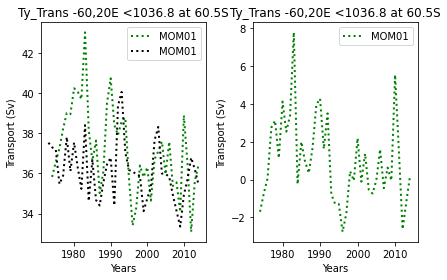

In [314]:
plt.subplot(121)
plt.plot(yrs[1:],pert01_60to20E,linestyle=':',color='g',linewidth=2,label='MOM01')
plt.plot(yrs,cntrl01_60to20E,linestyle=':',color='k',linewidth=2,label='MOM01')
#plt.xlim((1037.5,1035))
plt.ylabel('Transport (Sv)')
plt.xlabel('Years')
#plt.xlim([1973,1973+12])
tit='Ty_Trans -60,20E <1036.8 at 60.5S'
plt.title(tit)
plt.legend(fontsize=10)

plt.subplot(122)
plt.plot(yrs[1:],pert01_60to20E-cntrl01_60to20E,linestyle=':',color='g',linewidth=2,label='MOM01')
#plt.xlim((1037.5,1035))
plt.ylabel('Transport (Sv)')
plt.xlabel('Years')
#plt.xlim([1973,1973+12])
tit='Ty_Trans -60,20E <1036.8 at 60.5S'
plt.title(tit)
plt.legend(fontsize=10)


plt.tight_layout()

In [235]:
NYFCntrlDir = '/g/data/v45/pas561/mom/archive/wombat_jun16z/output*'
NYFCntrlDir1 = '/g/data/v45/pas561/mom/archive/wombat_jun16z/Tdim_output*'
#this has 3 years of a wind perturbation - get a nice 3 year polynya.
NYFPertDir = '/g/data/v45/pas561/mom/archive/wombat_jun16z_wp2_74/'

In [236]:
Ocean_File = os.path.join(NYFCntrlDir2,'ocean__*.nc')
print(Ocean_File)
cntrl1=xr.open_mfdataset(Ocean_File,engine='netcdf4',combine='nested',concat_dim='time')#,decode_times=False)
cntrl1

/g/data/v45/pas561/mom/archive/wombat_jun16z/Tdim_output*/ocean__*.nc


<xarray.Dataset>
Dimensions:          (xt_ocean: 1440, yt_ocean: 1080, st_ocean: 50,
                      st_edges_ocean: 51, time: 11, nv: 2, xu_ocean: 1440,
                      yu_ocean: 1080, sw_ocean: 50, sw_edges_ocean: 51,
                      grid_xt_ocean: 1440, grid_yu_ocean: 1080, potrho: 80,
                      potrho_edges: 81)
Coordinates: (12/13)
  * xt_ocean         (xt_ocean) float64 -279.9 -279.6 -279.4 ... 79.62 79.88
  * yt_ocean         (yt_ocean) float64 -81.08 -80.97 -80.87 ... 89.84 89.95
  * st_ocean         (st_ocean) float64 5.034 15.1 25.22 ... 5.185e+03 5.395e+03
  * st_edges_ocean   (st_edges_ocean) float64 0.0 10.07 ... 5.29e+03 5.5e+03
  * nv               (nv) float64 1.0 2.0
  * xu_ocean         (xu_ocean) float64 -279.8 -279.5 -279.2 ... 79.5 79.75 80.0
    ...               ...
  * sw_ocean         (sw_ocean) float64 10.07 20.16 30.29 ... 5.29e+03 5.5e+03
  * sw_edges_ocean   (sw_edges_ocean) float64 5.034 15.1 ... 5.395e+03 5.5e+03
  * grid_xt_ocean    (grid_xt_ocean) float64 -279.9 -279.6 ... 79.62 79.88
  * grid_yu_ocean    (grid_yu_ocean) float64 -81.02 -80.92 -80.81 ... 89.89 90.0
  * potrho           (potrho) float64 1.028e+03 1.028e+03 ... 1.038e+03
  * potrho_edges     (potrho_edges) float64 1.028e+03 1.028e+03 ... 1.038e+03
Dimensions without coordinates: time
Data variables: (12/20)
    Time             (time) object dask.array<chunksize=(1,), meta=np.ndarray>
    temp             (time, st_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 50, 1080, 1440), meta=np.ndarray>
    salt             (time, st_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 50, 1080, 1440), meta=np.ndarray>
    u                (time, st_ocean, yu_ocean, xu_ocean) float32 dask.array<chunksize=(1, 50, 1080, 1440), meta=np.ndarray>
    v                (time, st_ocean, yu_ocean, xu_ocean) float32 dask.array<chunksize=(1, 50, 1080, 1440), meta=np.ndarray>
    w                (time, sw_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 50, 1080, 1440), meta=np.ndarray>
    ...               ...
    mld              (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 1080, 1440), meta=np.ndarray>
    pbot_t           (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 1080, 1440), meta=np.ndarray>
    average_T1       (time) datetime64[ns] dask.array<chunksize=(1,), meta=np.ndarray>
    average_T2       (time) datetime64[ns] dask.array<chunksize=(1,), meta=np.ndarray>
    average_DT       (time) timedelta64[ns] dask.array<chunksize=(1,), meta=np.ndarray>
    Time_bounds      (time, nv) timedelta64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
Attributes:
    filename:   ocean__1971_07.nc
    title:      mom5_0p25global_bgc
    grid_type:  mosaic
    grid_tile:  1
    history:    Wed Dec  6 15:07:51 2017: ncrename -d Time,time output1972/oc...
    NCO:        "4.6.4"

In [237]:
Ocean_File = os.path.join(NYFCntrlDir,'ocean__*.nc')
print(Ocean_File)
cntrl=xr.open_mfdataset(Ocean_File,engine='netcdf4',combine='nested',concat_dim='Time')#,decode_times=False)
cntrl

/g/data/v45/pas561/mom/archive/wombat_jun16z/output*/ocean__*.nc


<xarray.Dataset>
Dimensions:         (xt_ocean: 1440, yt_ocean: 1080, st_ocean: 50,
                     st_edges_ocean: 51, Time: 48, nv: 2, xu_ocean: 1440,
                     yu_ocean: 1080, sw_ocean: 50, sw_edges_ocean: 51,
                     grid_xt_ocean: 1440, grid_yu_ocean: 1080, potrho: 80,
                     potrho_edges: 81)
Coordinates: (12/14)
  * xt_ocean        (xt_ocean) float64 -279.9 -279.6 -279.4 ... 79.62 79.88
  * yt_ocean        (yt_ocean) float64 -81.08 -80.97 -80.87 ... 89.84 89.95
  * st_ocean        (st_ocean) float64 5.034 15.1 25.22 ... 5.185e+03 5.395e+03
  * st_edges_ocean  (st_edges_ocean) float64 0.0 10.07 ... 5.29e+03 5.5e+03
  * Time            (Time) object 1980-07-02 12:00:00 ... 2027-07-02 12:00:00
  * nv              (nv) float64 1.0 2.0
    ...              ...
  * sw_ocean        (sw_ocean) float64 10.07 20.16 30.29 ... 5.29e+03 5.5e+03
  * sw_edges_ocean  (sw_edges_ocean) float64 5.034 15.1 ... 5.395e+03 5.5e+03
  * grid_xt_ocean   (grid_xt_ocean) float64 -279.9 -279.6 -279.4 ... 79.62 79.88
  * grid_yu_ocean   (grid_yu_ocean) float64 -81.02 -80.92 -80.81 ... 89.89 90.0
  * potrho          (potrho) float64 1.028e+03 1.028e+03 ... 1.038e+03 1.038e+03
  * potrho_edges    (potrho_edges) float64 1.028e+03 1.028e+03 ... 1.038e+03
Data variables: (12/16)
    temp            (Time, st_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 50, 1080, 1440), meta=np.ndarray>
    salt            (Time, st_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 50, 1080, 1440), meta=np.ndarray>
    u               (Time, st_ocean, yu_ocean, xu_ocean) float32 dask.array<chunksize=(1, 50, 1080, 1440), meta=np.ndarray>
    v               (Time, st_ocean, yu_ocean, xu_ocean) float32 dask.array<chunksize=(1, 50, 1080, 1440), meta=np.ndarray>
    w               (Time, sw_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 50, 1080, 1440), meta=np.ndarray>
    pot_rho_0       (Time, st_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 50, 1080, 1440), meta=np.ndarray>
    ...              ...
    mld             (Time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 1080, 1440), meta=np.ndarray>
    pbot_t          (Time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 1080, 1440), meta=np.ndarray>
    average_T1      (Time) datetime64[ns] dask.array<chunksize=(1,), meta=np.ndarray>
    average_T2      (Time) datetime64[ns] dask.array<chunksize=(1,), meta=np.ndarray>
    average_DT      (Time) timedelta64[ns] dask.array<chunksize=(1,), meta=np.ndarray>
    Time_bounds     (Time, nv) timedelta64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
Attributes:
    filename:   ocean__1980_07.nc
    title:      mom5_0p25global_bgc
    grid_type:  mosaic
    grid_tile:  1

In [238]:
tmp=cntrl1.ty_trans_rho.sel(potrho=slice(rho_min,1038),grid_xt_ocean=slice(-60,-30)).sel(grid_yu_ocean=-60.5,method='nearest')
tmp=tmp.sum('potrho').sum('grid_xt_ocean')
cntrl1_trans_rho=tmp.compute()

In [239]:
tmp=cntrl.ty_trans_rho.sel(potrho=slice(rho_min,1038),grid_xt_ocean=slice(-60,-30)).sel(grid_yu_ocean=-60.5,method='nearest')
tmp=tmp.sum('potrho').sum('grid_xt_ocean') 
cntrl_trans_rho=tmp.compute()

In [240]:
cntrl025_60to30=np.append(cntrl1_trans_rho[2:],cntrl_trans_rho)
cntrl025_60to30

array([24.899681, 24.737782, 24.970469, 24.974632, 24.850353, 24.744654,
       24.963194, 25.00573 , 25.00573 , 24.980804, 25.099049, 25.158236,
       24.962303, 25.02467 , 25.119135, 25.138391, 25.250639, 25.062057,
       25.053627, 25.076048, 25.076155, 25.025103, 25.198122, 25.134048,
       24.832666, 24.916914, 24.96445 , 25.188946, 24.952065, 25.065899,
       25.192194, 25.058691, 25.184746, 25.494507, 25.223915, 25.198551,
       25.499231, 25.389969, 25.22912 , 25.328297, 25.217014, 24.977966,
       25.100725, 24.997232, 25.180367, 25.1113  , 24.970963, 25.058413,
       25.011694, 25.0641  , 25.16734 , 25.084446, 25.119917, 25.068409,
       24.883572, 25.061523, 25.026123], dtype=float32)

In [241]:
tmp=cntrl1.ty_trans_rho.sel(potrho=slice(rho_min,1038),grid_xt_ocean=slice(-60,-20)).sel(grid_yu_ocean=-60.5,method='nearest')
tmp=tmp.sum('potrho').sum('grid_xt_ocean')
cntrl1_trans_rho=tmp.compute()

In [242]:
tmp=cntrl.ty_trans_rho.sel(potrho=slice(rho_min,1038),grid_xt_ocean=slice(-60,-20)).sel(grid_yu_ocean=-60.5,method='nearest')
tmp=tmp.sum('potrho').sum('grid_xt_ocean') 
cntrl_trans_rho=tmp.compute()

In [243]:
cntrl025_60to20=np.append(cntrl1_trans_rho[2:],cntrl_trans_rho)
cntrl025_60to20

array([26.905373, 26.604488, 27.173262, 27.043865, 26.802309, 26.5993  ,
       26.921305, 26.891283, 26.891283, 26.889734, 27.051725, 26.962132,
       26.733116, 26.936335, 27.117987, 27.23079 , 27.312948, 26.961843,
       27.157951, 27.122328, 27.319221, 27.094942, 27.437893, 27.070719,
       26.407087, 27.02118 , 26.96386 , 27.227669, 26.667164, 27.06957 ,
       27.09346 , 26.696152, 27.024357, 27.608257, 27.283804, 27.253294,
       27.850872, 27.493038, 27.46961 , 27.817305, 27.614697, 27.328058,
       27.587727, 27.373144, 27.844257, 27.31458 , 27.241852, 27.36655 ,
       27.40812 , 27.362299, 27.654545, 27.318657, 27.30631 , 27.404922,
       27.104462, 27.48464 , 27.53511 ], dtype=float32)

In [244]:
tmp=cntrl1.ty_trans_rho.sel(potrho=slice(rho_min,1038),grid_xt_ocean=slice(-60,-10)).sel(grid_yu_ocean=-60.5,method='nearest')
tmp=tmp.sum('potrho').sum('grid_xt_ocean')
cntrl1_trans_rho=tmp.compute()

In [245]:
tmp=cntrl.ty_trans_rho.sel(potrho=slice(rho_min,1038),grid_xt_ocean=slice(-60,-10)).sel(grid_yu_ocean=-60.5,method='nearest')
tmp=tmp.sum('potrho').sum('grid_xt_ocean') 
cntrl_trans_rho=tmp.compute()

In [246]:
cntrl025_60to10=np.append(cntrl1_trans_rho[2:],cntrl_trans_rho)
cntrl025_60to10

array([32.02582 , 31.678635, 32.030582, 31.848967, 31.615318, 31.425922,
       31.640846, 31.536896, 31.536896, 31.493704, 31.623499, 31.529621,
       31.273994, 31.354843, 31.557621, 31.647182, 31.710823, 31.41256 ,
       31.54351 , 31.568632, 31.713326, 31.55859 , 31.739616, 31.461645,
       30.953457, 31.27172 , 31.209896, 31.409101, 30.975733, 31.21557 ,
       31.207447, 30.851442, 31.209156, 31.711376, 31.445095, 31.540154,
       32.100914, 31.91157 , 31.948975, 32.2163  , 32.184925, 31.957146,
       32.251965, 32.114677, 32.390903, 32.018528, 31.945751, 32.15109 ,
       32.13631 , 32.163376, 32.3899  , 32.115757, 32.14535 , 32.184856,
       31.886524, 32.29008 , 32.32262 ], dtype=float32)

In [247]:
tmp=cntrl1.ty_trans_rho.sel(potrho=slice(rho_min,1038),grid_xt_ocean=slice(-60,0)).sel(grid_yu_ocean=-60.5,method='nearest')
tmp=tmp.sum('potrho').sum('grid_xt_ocean')
cntrl1_trans_rho=tmp.compute()

In [248]:
tmp=cntrl.ty_trans_rho.sel(potrho=slice(rho_min,1038),grid_xt_ocean=slice(-60,0)).sel(grid_yu_ocean=-60.5,method='nearest')
tmp=tmp.sum('potrho').sum('grid_xt_ocean') 
cntrl_trans_rho=tmp.compute()

In [249]:
cntrl025_60to0=np.append(cntrl1_trans_rho[2:],cntrl_trans_rho)
cntrl025_60to0

array([32.61571 , 32.36403 , 32.810917, 32.58844 , 32.5553  , 32.428604,
       32.742096, 32.72646 , 32.72646 , 32.774853, 32.951714, 32.808357,
       32.556606, 32.556755, 32.727898, 32.79686 , 32.83848 , 32.569572,
       32.62805 , 32.574234, 32.776894, 32.702015, 33.093945, 32.97785 ,
       32.422802, 32.72371 , 32.72342 , 33.06393 , 32.588238, 32.781643,
       32.85029 , 32.408703, 32.671165, 32.948067, 32.50424 , 32.521416,
       33.096306, 32.854523, 32.832397, 33.050278, 32.99534 , 32.68139 ,
       32.938683, 32.85329 , 33.24662 , 33.003872, 32.97201 , 33.147003,
       33.070095, 33.139133, 33.424484, 33.26003 , 33.28252 , 33.208965,
       32.819576, 33.282753, 33.348186], dtype=float32)

In [250]:
tmp=cntrl1.ty_trans_rho.sel(potrho=slice(rho_min,1038),grid_xt_ocean=slice(-60,20)).sel(grid_yu_ocean=-60.5,method='nearest')
tmp=tmp.sum('potrho').sum('grid_xt_ocean')
cntrl1_trans_rho=tmp.compute()

In [251]:
tmp=cntrl.ty_trans_rho.sel(potrho=slice(rho_min,1038),grid_xt_ocean=slice(-60,20)).sel(grid_yu_ocean=-60.5,method='nearest')
tmp=tmp.sum('potrho').sum('grid_xt_ocean') 
cntrl_trans_rho=tmp.compute()

In [252]:
cntrl025_60to20E=np.append(cntrl1_trans_rho[2:],cntrl_trans_rho)
cntrl025_60to20E

array([40.199093, 39.730556, 40.39782 , 40.079178, 40.233448, 39.96244 ,
       40.24611 , 40.046947, 40.046947, 40.04015 , 40.303223, 40.208824,
       40.214153, 40.009674, 40.32055 , 40.468063, 40.307884, 40.13646 ,
       40.33104 , 40.40355 , 40.60403 , 40.492256, 40.520786, 40.63108 ,
       39.935078, 40.136055, 40.338318, 40.61455 , 40.33777 , 40.307327,
       40.244087, 40.155228, 40.957443, 41.082527, 40.47087 , 40.15685 ,
       40.894173, 40.674644, 40.730766, 40.54351 , 41.083855, 40.21093 ,
       40.857544, 40.745975, 40.72856 , 40.620224, 40.878876, 41.120674,
       40.77356 , 40.93407 , 41.098633, 40.906086, 41.18255 , 41.004356,
       40.53174 , 41.371433, 41.051064], dtype=float32)

In [253]:
Ocean_File = os.path.join(NYFPertDir,'output*/ocean__*.nc')
print(Ocean_File)
pert=xr.open_mfdataset(Ocean_File,engine='netcdf4',combine='nested',concat_dim='Time')#,decode_times=False)
pert

/g/data/v45/pas561/mom/archive/wombat_jun16z_wp2_74/output*/ocean__*.nc


<xarray.Dataset>
Dimensions:          (xt_ocean: 1440, yt_ocean: 1080, st_ocean: 50,
                      st_edges_ocean: 51, Time: 51, nv: 2, xu_ocean: 1440,
                      yu_ocean: 1080, sw_ocean: 50, sw_edges_ocean: 51,
                      grid_xt_ocean: 1440, grid_yu_ocean: 1080, potrho: 80,
                      potrho_edges: 81)
Coordinates: (12/14)
  * xt_ocean         (xt_ocean) float64 -279.9 -279.6 -279.4 ... 79.62 79.88
  * yt_ocean         (yt_ocean) float64 -81.08 -80.97 -80.87 ... 89.84 89.95
  * st_ocean         (st_ocean) float64 5.034 15.1 25.22 ... 5.185e+03 5.395e+03
  * st_edges_ocean   (st_edges_ocean) float64 0.0 10.07 ... 5.29e+03 5.5e+03
  * Time             (Time) object 1973-07-02 12:00:00 ... 2023-07-02 12:00:00
  * nv               (nv) float64 1.0 2.0
    ...               ...
  * sw_ocean         (sw_ocean) float64 10.07 20.16 30.29 ... 5.29e+03 5.5e+03
  * sw_edges_ocean   (sw_edges_ocean) float64 5.034 15.1 ... 5.395e+03 5.5e+03
  * grid_xt_ocean    (grid_xt_ocean) float64 -279.9 -279.6 ... 79.62 79.88
  * grid_yu_ocean    (grid_yu_ocean) float64 -81.02 -80.92 -80.81 ... 89.89 90.0
  * potrho           (potrho) float64 1.028e+03 1.028e+03 ... 1.038e+03
  * potrho_edges     (potrho_edges) float64 1.028e+03 1.028e+03 ... 1.038e+03
Data variables: (12/19)
    temp             (Time, st_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 50, 1080, 1440), meta=np.ndarray>
    salt             (Time, st_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 50, 1080, 1440), meta=np.ndarray>
    u                (Time, st_ocean, yu_ocean, xu_ocean) float32 dask.array<chunksize=(1, 50, 1080, 1440), meta=np.ndarray>
    v                (Time, st_ocean, yu_ocean, xu_ocean) float32 dask.array<chunksize=(1, 50, 1080, 1440), meta=np.ndarray>
    w                (Time, sw_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 50, 1080, 1440), meta=np.ndarray>
    pot_rho_0        (Time, st_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 50, 1080, 1440), meta=np.ndarray>
    ...               ...
    mld              (Time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 1080, 1440), meta=np.ndarray>
    pbot_t           (Time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 1080, 1440), meta=np.ndarray>
    average_T1       (Time) datetime64[ns] dask.array<chunksize=(1,), meta=np.ndarray>
    average_T2       (Time) datetime64[ns] dask.array<chunksize=(1,), meta=np.ndarray>
    average_DT       (Time) timedelta64[ns] dask.array<chunksize=(1,), meta=np.ndarray>
    Time_bounds      (Time, nv) timedelta64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
Attributes:
    filename:   ocean__1973_07.nc
    title:      mom5_0p25global_bgc
    grid_type:  mosaic
    grid_tile:  1

In [254]:
tmp=pert.ty_trans_rho.sel(potrho=slice(rho_min,1038),grid_xt_ocean=slice(-60,-30)).sel(grid_yu_ocean=-60.5,method='nearest')
tmp=tmp.sum('potrho').sum('grid_xt_ocean') 
pert025_60to30=tmp.compute()

In [255]:
tmp=pert.ty_trans_rho.sel(potrho=slice(rho_min,1038),grid_xt_ocean=slice(-60,-20)).sel(grid_yu_ocean=-60.5,method='nearest')
tmp=tmp.sum('potrho').sum('grid_xt_ocean') 
pert025_60to20=tmp.compute()

In [256]:
tmp=pert.ty_trans_rho.sel(potrho=slice(rho_min,1038),grid_xt_ocean=slice(-60,-10)).sel(grid_yu_ocean=-60.5,method='nearest')
tmp=tmp.sum('potrho').sum('grid_xt_ocean') 
pert025_60to10=tmp.compute()

In [257]:
tmp=pert.ty_trans_rho.sel(potrho=slice(rho_min,1038),grid_xt_ocean=slice(-60,0)).sel(grid_yu_ocean=-60.5,method='nearest')
tmp=tmp.sum('potrho').sum('grid_xt_ocean') 
pert025_60to0=tmp.compute()

In [258]:
tmp=pert.ty_trans_rho.sel(potrho=slice(rho_min,1038),grid_xt_ocean=slice(-60,20)).sel(grid_yu_ocean=-60.5,method='nearest')
tmp=tmp.sum('potrho').sum('grid_xt_ocean') 
pert025_60to20E=tmp.compute()

In [259]:
yrs=np.arange(1973,2015,1)
yrs.shape

(42,)

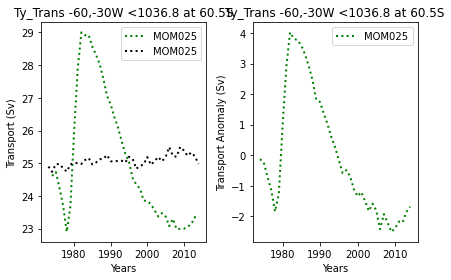

In [260]:
plt.subplot(121)
plt.plot(yrs[1:],pert025_60to30[:41],linestyle=':',color='g',linewidth=2,label='MOM025')
plt.plot(yrs,cntrl025_60to30[:42],linestyle=':',color='k',linewidth=2,label='MOM025')
#plt.xlim((1037.5,1035))
plt.ylabel('Transport (Sv)')
plt.xlabel('Years')
#plt.xlim([1973,1973+12])
tit='Ty_Trans -60,-30W <1036.8 at 60.5S'
plt.title(tit)
plt.legend(fontsize=10)

plt.subplot(122)
plt.plot(yrs[1:],pert025_60to30[:41]-cntrl025_60to30[1:42],linestyle=':',color='g',linewidth=2,label='MOM025')
#plt.xlim((1037.5,1035))
plt.ylabel('Transport Anomaly (Sv)')
plt.xlabel('Years')
#plt.xlim([1973,1973+12])
tit='Ty_Trans -60,-30W <1036.8 at 60.5S'
plt.title(tit)
plt.legend(fontsize=10)


plt.tight_layout()


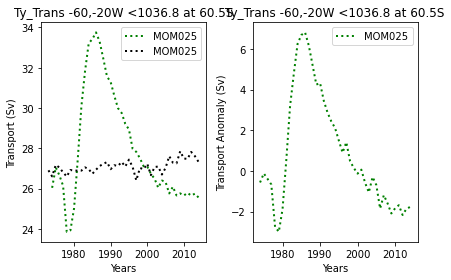

In [261]:
plt.subplot(121)
plt.plot(yrs[1:],pert025_60to20[:41],linestyle=':',color='g',linewidth=2,label='MOM025')
plt.plot(yrs,cntrl025_60to20[:42],linestyle=':',color='k',linewidth=2,label='MOM025')
#plt.xlim((1037.5,1035))
plt.ylabel('Transport (Sv)')
plt.xlabel('Years')
#plt.xlim([1973,1973+12])
tit='Ty_Trans -60,-20W <1036.8 at 60.5S'
plt.title(tit)
plt.legend(fontsize=10)

plt.subplot(122)
plt.plot(yrs[1:],pert025_60to20[:41]-cntrl025_60to20[1:42],linestyle=':',color='g',linewidth=2,label='MOM025')
#plt.xlim((1037.5,1035))
plt.ylabel('Transport Anomaly (Sv)')
plt.xlabel('Years')
#plt.xlim([1973,1973+12])
tit='Ty_Trans -60,-20W <1036.8 at 60.5S'
plt.title(tit)
plt.legend(fontsize=10)


plt.tight_layout()


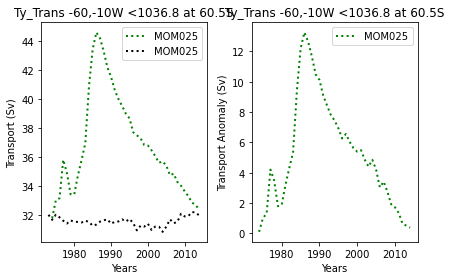

In [262]:
plt.subplot(121)
plt.plot(yrs[1:],pert025_60to10[:41],linestyle=':',color='g',linewidth=2,label='MOM025')
plt.plot(yrs,cntrl025_60to10[:42],linestyle=':',color='k',linewidth=2,label='MOM025')
#plt.xlim((1037.5,1035))
plt.ylabel('Transport (Sv)')
plt.xlabel('Years')
#plt.xlim([1973,1973+12])
tit='Ty_Trans -60,-10W <1036.8 at 60.5S'
plt.title(tit)
plt.legend(fontsize=10)

plt.subplot(122)
plt.plot(yrs[1:],pert025_60to10[:41]-cntrl025_60to10[1:42],linestyle=':',color='g',linewidth=2,label='MOM025')
#plt.xlim((1037.5,1035))
plt.ylabel('Transport Anomaly (Sv)')
plt.xlabel('Years')
#plt.xlim([1973,1973+12])
tit='Ty_Trans -60,-10W <1036.8 at 60.5S'
plt.title(tit)
plt.legend(fontsize=10)


plt.tight_layout()


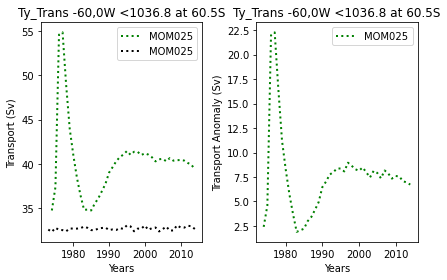

In [263]:
plt.subplot(121)
plt.plot(yrs[1:],pert025_60to0[:41],linestyle=':',color='g',linewidth=2,label='MOM025')
plt.plot(yrs,cntrl025_60to0[:42],linestyle=':',color='k',linewidth=2,label='MOM025')
#plt.xlim((1037.5,1035))
plt.ylabel('Transport (Sv)')
plt.xlabel('Years')
#plt.xlim([1973,1973+12])
tit='Ty_Trans -60,0W <1036.8 at 60.5S'
plt.title(tit)
plt.legend(fontsize=10)

plt.subplot(122)
plt.plot(yrs[1:],pert025_60to0[:41]-cntrl025_60to0[1:42],linestyle=':',color='g',linewidth=2,label='MOM025')
#plt.xlim((1037.5,1035))
plt.ylabel('Transport Anomaly (Sv)')
plt.xlabel('Years')
#plt.xlim([1973,1973+12])
tit='Ty_Trans -60,0W <1036.8 at 60.5S'
plt.title(tit)
plt.legend(fontsize=10)


plt.tight_layout()


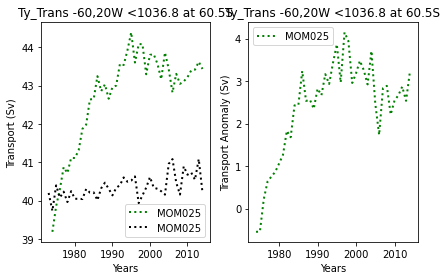

In [264]:
plt.subplot(121)
plt.plot(yrs[1:],pert025_60to20E[:41],linestyle=':',color='g',linewidth=2,label='MOM025')
plt.plot(yrs,cntrl025_60to20E[:42],linestyle=':',color='k',linewidth=2,label='MOM025')
#plt.xlim((1037.5,1035))
plt.ylabel('Transport (Sv)')
plt.xlabel('Years')
#plt.xlim([1973,1973+12])
tit='Ty_Trans -60,20W <1036.8 at 60.5S'
plt.title(tit)
plt.legend(fontsize=10)

plt.subplot(122)
plt.plot(yrs[1:],pert025_60to20E[:41]-cntrl025_60to20E[1:42],linestyle=':',color='g',linewidth=2,label='MOM025')
#plt.xlim((1037.5,1035))
plt.ylabel('Transport Anomaly (Sv)')
plt.xlabel('Years')
#plt.xlim([1973,1973+12])
tit='Ty_Trans -60,20W <1036.8 at 60.5S'
plt.title(tit)
plt.legend(fontsize=10)


plt.tight_layout()

In [104]:
yrs[0:41]

array([1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984,
       1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
       1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014])

In [73]:
Ocean_File = os.path.join(NYFCntrlDir,'ocean__*.nc')
print(Ocean_File)
cntrl=xr.open_mfdataset(Ocean_File,engine='netcdf4',combine='nested',concat_dim='Time')#,decode_times=False)
cntrl

/g/data/v45/pas561/mom/archive/wombat_jun16z/output*/ocean__*.nc


<xarray.Dataset>
Dimensions:         (xt_ocean: 1440, yt_ocean: 1080, st_ocean: 50,
                     st_edges_ocean: 51, Time: 48, nv: 2, xu_ocean: 1440,
                     yu_ocean: 1080, sw_ocean: 50, sw_edges_ocean: 51,
                     grid_xt_ocean: 1440, grid_yu_ocean: 1080, potrho: 80,
                     potrho_edges: 81)
Coordinates: (12/14)
  * xt_ocean        (xt_ocean) float64 -279.9 -279.6 -279.4 ... 79.62 79.88
  * yt_ocean        (yt_ocean) float64 -81.08 -80.97 -80.87 ... 89.84 89.95
  * st_ocean        (st_ocean) float64 5.034 15.1 25.22 ... 5.185e+03 5.395e+03
  * st_edges_ocean  (st_edges_ocean) float64 0.0 10.07 ... 5.29e+03 5.5e+03
  * Time            (Time) object 1980-07-02 12:00:00 ... 2027-07-02 12:00:00
  * nv              (nv) float64 1.0 2.0
    ...              ...
  * sw_ocean        (sw_ocean) float64 10.07 20.16 30.29 ... 5.29e+03 5.5e+03
  * sw_edges_ocean  (sw_edges_ocean) float64 5.034 15.1 ... 5.395e+03 5.5e+03
  * grid_xt_ocean   (grid_xt_ocean) float64 -279.9 -279.6 -279.4 ... 79.62 79.88
  * grid_yu_ocean   (grid_yu_ocean) float64 -81.02 -80.92 -80.81 ... 89.89 90.0
  * potrho          (potrho) float64 1.028e+03 1.028e+03 ... 1.038e+03 1.038e+03
  * potrho_edges    (potrho_edges) float64 1.028e+03 1.028e+03 ... 1.038e+03
Data variables: (12/16)
    temp            (Time, st_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 50, 1080, 1440), meta=np.ndarray>
    salt            (Time, st_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 50, 1080, 1440), meta=np.ndarray>
    u               (Time, st_ocean, yu_ocean, xu_ocean) float32 dask.array<chunksize=(1, 50, 1080, 1440), meta=np.ndarray>
    v               (Time, st_ocean, yu_ocean, xu_ocean) float32 dask.array<chunksize=(1, 50, 1080, 1440), meta=np.ndarray>
    w               (Time, sw_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 50, 1080, 1440), meta=np.ndarray>
    pot_rho_0       (Time, st_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 50, 1080, 1440), meta=np.ndarray>
    ...              ...
    mld             (Time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 1080, 1440), meta=np.ndarray>
    pbot_t          (Time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 1080, 1440), meta=np.ndarray>
    average_T1      (Time) datetime64[ns] dask.array<chunksize=(1,), meta=np.ndarray>
    average_T2      (Time) datetime64[ns] dask.array<chunksize=(1,), meta=np.ndarray>
    average_DT      (Time) timedelta64[ns] dask.array<chunksize=(1,), meta=np.ndarray>
    Time_bounds     (Time, nv) timedelta64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
Attributes:
    filename:   ocean__1980_07.nc
    title:      mom5_0p25global_bgc
    grid_type:  mosaic
    grid_tile:  1

In [ ]:
tmp=cntrl.ty_trans_rho.sel(potrho=slice(rho_min,1038),grid_xt_ocean=slice(-60,20)).sel(grid_yu_ocean=-60.5,method='nearest')
tmp=tmp.sum('potrho').sum('grid_xt_ocean') 
cntrl_trans_rho=tmp.compute()

In [45]:
psi= cntrl.ty_trans_rho.sum('grid_xt_ocean')
#psi = psi / (1e6*rho) # converts kg/s to Sv
psi = (psi.cumsum('potrho') - psi.sum('potrho')).compute()
print(psi.shape)
cntrl_moc=psi

(48, 80, 1080)


In [47]:
cntrl_moc_avg=cntrl_moc.mean(dim='Time').compute()
cntrl_moc_avg

<xarray.DataArray 'ty_trans_rho' (potrho: 80, grid_yu_ocean: 1080)>
array([[ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
        -2.4365923e-04,  1.3652776e-03, -1.0794979e-05],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
        -1.7344253e-03,  8.3354750e-04, -6.2889740e-05],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
        -2.3766020e-03,  5.8724248e-04,  1.5384244e-04],
       ...,
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00]], dtype=float32)
Coordinates:
  * grid_yu_ocean  (grid_yu_ocean) float64 -81.02 -80.92 -80.81 ... 89.89 90.0
  * potrho         (potrho) float64 1.028e+03 1.028e+03 ... 1.038e+03 1.038e+03

/jobfs/67419500.gadi-pbs/ipykernel_80247/2451697041.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticks)


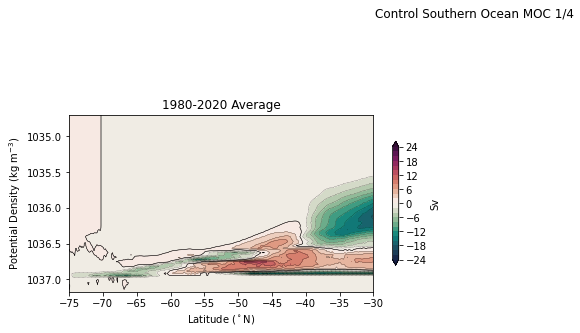

In [48]:
#fig,ax = plt.subplots(2,2,figsize=(10, 5)) 
plt.figure(figsize=(15,15))
plt.suptitle('Control Southern Ocean MOC 1/4')

plt.subplot(4,2,1)
ax = plt.gca()
clev = np.arange(-24,26,2)
yticks = np.array([1033, 1035, 1035.5, 1036,1036.5, 1037,1037.5])
scfac = 8  ## A power to set teh stretching

p1=ax.contourf(cntrl_moc_avg.grid_yu_ocean,cntrl_moc_avg.potrho**scfac, cntrl_moc_avg, cmap=cmocean.curl, levels=clev, extend='both')
cb=plt.colorbar(p1,orientation='vertical', shrink = 0.7)
    
cb.ax.set_ylabel('Sv')
ax.contour(cntrl_moc_avg.grid_yu_ocean,cntrl_moc_avg.potrho**scfac, cntrl_moc_avg, levels=clev, colors='k', linewidths=0.25)
ax.contour(cntrl_moc_avg.grid_yu_ocean,cntrl_moc_avg.potrho**scfac, cntrl_moc_avg, levels=[0.0,], colors='k', linewidths=0.5)

#ax.set_yticks((yticks-1028)**scfac)
ax.set_yticklabels(yticks)
#ax.set_ylim([0.5**scfac, 9.2**scfac])
ax.invert_yaxis()
ax.set_ylabel('Potential Density (kg m$^{-3}$)')
ax.set_xlabel('Latitude ($^\circ$N)')
ax.set_xlim([-75,-30])
ax.set_title('1980-2020 Average');

In [ ]:
cntrl.potrho

In [49]:
tmp=cntrl.ty_trans_rho.sel(potrho=slice(rho_min,1038),grid_xt_ocean=slice(-60,20)).sel(grid_yu_ocean=-60.5,method='nearest')
tmp=tmp.sum('potrho').sum('grid_xt_ocean') 
cntrl_trans_rho=tmp.compute()

In [50]:
tmp=cntrl.ty_trans.sel(st_ocean=slice(4000,6000),xt_ocean=slice(-60,20)).sel(yu_ocean=-60.5,method='nearest')
tmp=tmp.sum('st_ocean').sum('xt_ocean') 
cntrl_trans=tmp.compute()

In [51]:
cntrl_trans_rho

<xarray.DataArray 'ty_trans_rho' (Time: 48)>
array([50.654682, 50.928806, 50.719776, 50.8966  , 50.592106, 50.82135 ,
       51.11166 , 50.747864, 50.606842, 50.73503 , 50.88282 , 51.063248,
       50.88617 , 50.954376, 50.930473, 50.357468, 50.454334, 50.78927 ,
       50.83275 , 50.552498, 50.544556, 50.331017, 50.6779  , 51.106804,
       51.238503, 51.07387 , 50.48225 , 51.186974, 50.946877, 51.09658 ,
       50.812473, 51.358795, 50.85157 , 51.151684, 51.074547, 51.09223 ,
       50.879448, 51.274887, 51.306057, 51.12452 , 51.122902, 51.23857 ,
       51.099762, 51.299717, 51.15966 , 50.974224, 51.509647, 51.20529 ],
      dtype=float32)
Coordinates:
  * Time           (Time) object 1980-07-02 12:00:00 ... 2027-07-02 12:00:00
    grid_yu_ocean  float64 -60.52

In [52]:
cntrl_trans

<xarray.DataArray 'ty_trans' (Time: 48)>
array([3.8558836, 3.8791418, 3.8519027, 3.8639965, 3.8337474, 3.8666203,
       3.874693 , 3.837777 , 3.8281767, 3.8593237, 3.860783 , 3.899861 ,
       3.8861575, 3.8815308, 3.896889 , 3.805546 , 3.8641698, 3.9108949,
       3.9309368, 3.9133306, 3.9169042, 3.9033842, 3.9025817, 4.012135 ,
       3.9881425, 3.9188576, 3.8556511, 3.9203873, 3.8663447, 3.877121 ,
       3.8297195, 3.8995743, 3.7859535, 3.8732855, 3.849861 , 3.8375194,
       3.8072996, 3.8488176, 3.864532 , 3.8196492, 3.8308926, 3.8413272,
       3.8029919, 3.8344915, 3.8105135, 3.7600148, 3.863265 , 3.809352 ],
      dtype=float32)
Coordinates:
  * Time      (Time) object 1980-07-02 12:00:00 ... 2027-07-02 12:00:00
    yu_ocean  float64 -60.52

In [56]:
Ocean_File = os.path.join(NYFPertDir,'output*/ocean__*.nc')
print(Ocean_File)
pert=xr.open_mfdataset(Ocean_File,engine='netcdf4',combine='nested',concat_dim='Time')#,decode_times=False)
pert

/g/data/v45/pas561/mom/archive/wombat_jun16z_wp2_74/output*/ocean__*.nc


<xarray.Dataset>
Dimensions:          (xt_ocean: 1440, yt_ocean: 1080, st_ocean: 50,
                      st_edges_ocean: 51, Time: 51, nv: 2, xu_ocean: 1440,
                      yu_ocean: 1080, sw_ocean: 50, sw_edges_ocean: 51,
                      grid_xt_ocean: 1440, grid_yu_ocean: 1080, potrho: 80,
                      potrho_edges: 81)
Coordinates: (12/14)
  * xt_ocean         (xt_ocean) float64 -279.9 -279.6 -279.4 ... 79.62 79.88
  * yt_ocean         (yt_ocean) float64 -81.08 -80.97 -80.87 ... 89.84 89.95
  * st_ocean         (st_ocean) float64 5.034 15.1 25.22 ... 5.185e+03 5.395e+03
  * st_edges_ocean   (st_edges_ocean) float64 0.0 10.07 ... 5.29e+03 5.5e+03
  * Time             (Time) object 1973-07-02 12:00:00 ... 2023-07-02 12:00:00
  * nv               (nv) float64 1.0 2.0
    ...               ...
  * sw_ocean         (sw_ocean) float64 10.07 20.16 30.29 ... 5.29e+03 5.5e+03
  * sw_edges_ocean   (sw_edges_ocean) float64 5.034 15.1 ... 5.395e+03 5.5e+03
  * grid_xt_ocean    (grid_xt_ocean) float64 -279.9 -279.6 ... 79.62 79.88
  * grid_yu_ocean    (grid_yu_ocean) float64 -81.02 -80.92 -80.81 ... 89.89 90.0
  * potrho           (potrho) float64 1.028e+03 1.028e+03 ... 1.038e+03
  * potrho_edges     (potrho_edges) float64 1.028e+03 1.028e+03 ... 1.038e+03
Data variables: (12/19)
    temp             (Time, st_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 50, 1080, 1440), meta=np.ndarray>
    salt             (Time, st_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 50, 1080, 1440), meta=np.ndarray>
    u                (Time, st_ocean, yu_ocean, xu_ocean) float32 dask.array<chunksize=(1, 50, 1080, 1440), meta=np.ndarray>
    v                (Time, st_ocean, yu_ocean, xu_ocean) float32 dask.array<chunksize=(1, 50, 1080, 1440), meta=np.ndarray>
    w                (Time, sw_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 50, 1080, 1440), meta=np.ndarray>
    pot_rho_0        (Time, st_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 50, 1080, 1440), meta=np.ndarray>
    ...               ...
    mld              (Time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 1080, 1440), meta=np.ndarray>
    pbot_t           (Time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 1080, 1440), meta=np.ndarray>
    average_T1       (Time) datetime64[ns] dask.array<chunksize=(1,), meta=np.ndarray>
    average_T2       (Time) datetime64[ns] dask.array<chunksize=(1,), meta=np.ndarray>
    average_DT       (Time) timedelta64[ns] dask.array<chunksize=(1,), meta=np.ndarray>
    Time_bounds      (Time, nv) timedelta64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
Attributes:
    filename:   ocean__1973_07.nc
    title:      mom5_0p25global_bgc
    grid_type:  mosaic
    grid_tile:  1

In [61]:
tmp=pert.ty_trans_rho.sel(potrho=slice(rho_min,1038),grid_xt_ocean=slice(-60,20)).sel(grid_yu_ocean=-60.5,method='nearest')
tmp=tmp.sum('potrho').sum('grid_xt_ocean') 
pert_trans_rho=tmp.compute()

In [62]:
tmp=pert.ty_trans.sel(st_ocean=slice(4000,6000),xt_ocean=slice(-60,20)).sel(yu_ocean=-60.5,method='nearest')
tmp=tmp.sum('st_ocean').sum('xt_ocean') 
pert_trans=tmp.compute()

In [63]:
pert_trans_rho

<xarray.DataArray 'ty_trans_rho' (Time: 51)>
array([50.31534 , 51.016163, 51.339775, 51.471085, 51.633102, 51.766373,
       51.92438 , 51.8585  , 52.836796, 52.918884, 53.273106, 53.04664 ,
       53.367073, 53.182068, 53.12873 , 52.90313 , 53.264046, 53.51503 ,
       54.020622, 54.175735, 54.56469 , 55.031673, 54.124756, 54.579865,
       54.392303, 53.627663, 54.072575, 53.87467 , 53.90967 , 53.39302 ,
       54.16694 , 53.726852, 53.190903, 53.48343 , 53.309174, 53.429104,
       53.397324, 53.661026, 53.590504, 53.8188  , 53.8408  , 54.208656,
       53.833363, 53.789803, 54.151306, 54.310226, 54.077435, 53.822586,
       53.71425 , 54.687298, 56.34602 ], dtype=float32)
Coordinates:
  * Time           (Time) object 1973-07-02 12:00:00 ... 2023-07-02 12:00:00
    grid_yu_ocean  float64 -60.52

In [64]:
pert_trans

<xarray.DataArray 'ty_trans' (Time: 51)>
array([3.2401805, 3.2473483, 3.1361208, 3.5932488, 3.9276364, 4.4663734,
       4.7555585, 4.7793465, 4.666038 , 4.481869 , 4.3269715, 4.1493316,
       4.1116843, 3.9394846, 3.8675   , 3.7381516, 3.7181067, 3.6563447,
       3.6352203, 3.58083  , 3.5867794, 3.607028 , 3.4731257, 3.5228367,
       3.482677 , 3.39798  , 3.451637 , 3.4300532, 3.4070563, 3.3454032,
       3.448417 , 3.3718047, 3.289587 , 3.3253512, 3.312221 , 3.3301575,
       3.343801 , 3.3925068, 3.4088244, 3.4243665, 3.4303613, 3.5209029,
       3.457423 , 3.4662743, 3.5139947, 3.5102496, 3.4796312, 2.896391 ,
       2.7776423, 2.6753798, 2.6371264], dtype=float32)
Coordinates:
  * Time      (Time) object 1973-07-02 12:00:00 ... 2023-07-02 12:00:00
    yu_ocean  float64 -60.52

In [65]:
anom=pert_trans_rho-cntrl_trans_rho
anom

<xarray.DataArray 'ty_trans_rho' (Time: 44)>
array([1.2038193, 1.9079895, 2.1991081, 2.3765068, 2.4545326, 2.545723 ,
       2.0704079, 2.380867 , 2.2962875, 2.5290146, 2.6322098, 2.9573746,
       3.289566 , 3.6103134, 4.1012   , 3.7672882, 4.1255302, 3.603035 ,
       2.7949142, 3.5200768, 3.3301125, 3.5786552, 2.7151222, 3.060135 ,
       2.48835  , 2.117031 , 3.0011787, 2.1222   , 2.4822273, 2.300743 ,
       2.8485527, 2.2317085, 2.9672318, 2.6891174, 3.1341095, 2.7411308,
       2.9103546, 2.876419 , 3.0041695, 2.9529152, 2.6996841, 2.4756775,
       3.5875359, 5.046303 ], dtype=float32)
Coordinates:
  * Time           (Time) object 1980-07-02 12:00:00 ... 2023-07-02 12:00:00
    grid_yu_ocean  float64 -60.52

In [66]:
anom=pert_trans-cntrl_trans
anom

<xarray.DataArray 'ty_trans' (Time: 44)>
array([ 0.92346287,  0.7868962 ,  0.6299665 ,  0.46297503,  0.31558418,
        0.24506402,  0.06479168,  0.02972317, -0.09002519, -0.141217  ,
       -0.20443845, -0.2646408 , -0.30532742, -0.2947514 , -0.28986096,
       -0.33242035, -0.34133315, -0.4282179 , -0.53295684, -0.46169353,
       -0.48685098, -0.49632788, -0.5571785 , -0.5637181 , -0.6163378 ,
       -0.62927055, -0.5302999 , -0.6081662 , -0.5361872 , -0.53331995,
       -0.4372127 , -0.49074984, -0.36158705, -0.44292426, -0.32895803,
       -0.38009644, -0.34102535, -0.3348229 , -0.35428238, -0.34001803,
       -0.93450165, -1.0636849 , -1.1276121 , -1.197365  ], dtype=float32)
Coordinates:
  * Time      (Time) object 1980-07-02 12:00:00 ... 2023-07-02 12:00:00
    yu_ocean  float64 -60.52